# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>

In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as animation

sns.set(font_scale=1.6, palette='summer')

## Закон больших чисел

**Формулировка.**

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

### 1. Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.

In [2]:
size = 1000  # количество случайных величин
samples = sps.bernoulli(p=0.5).rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

Построим график

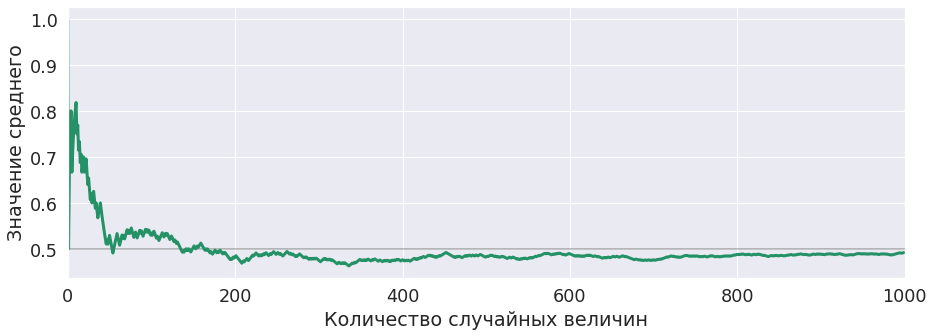

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

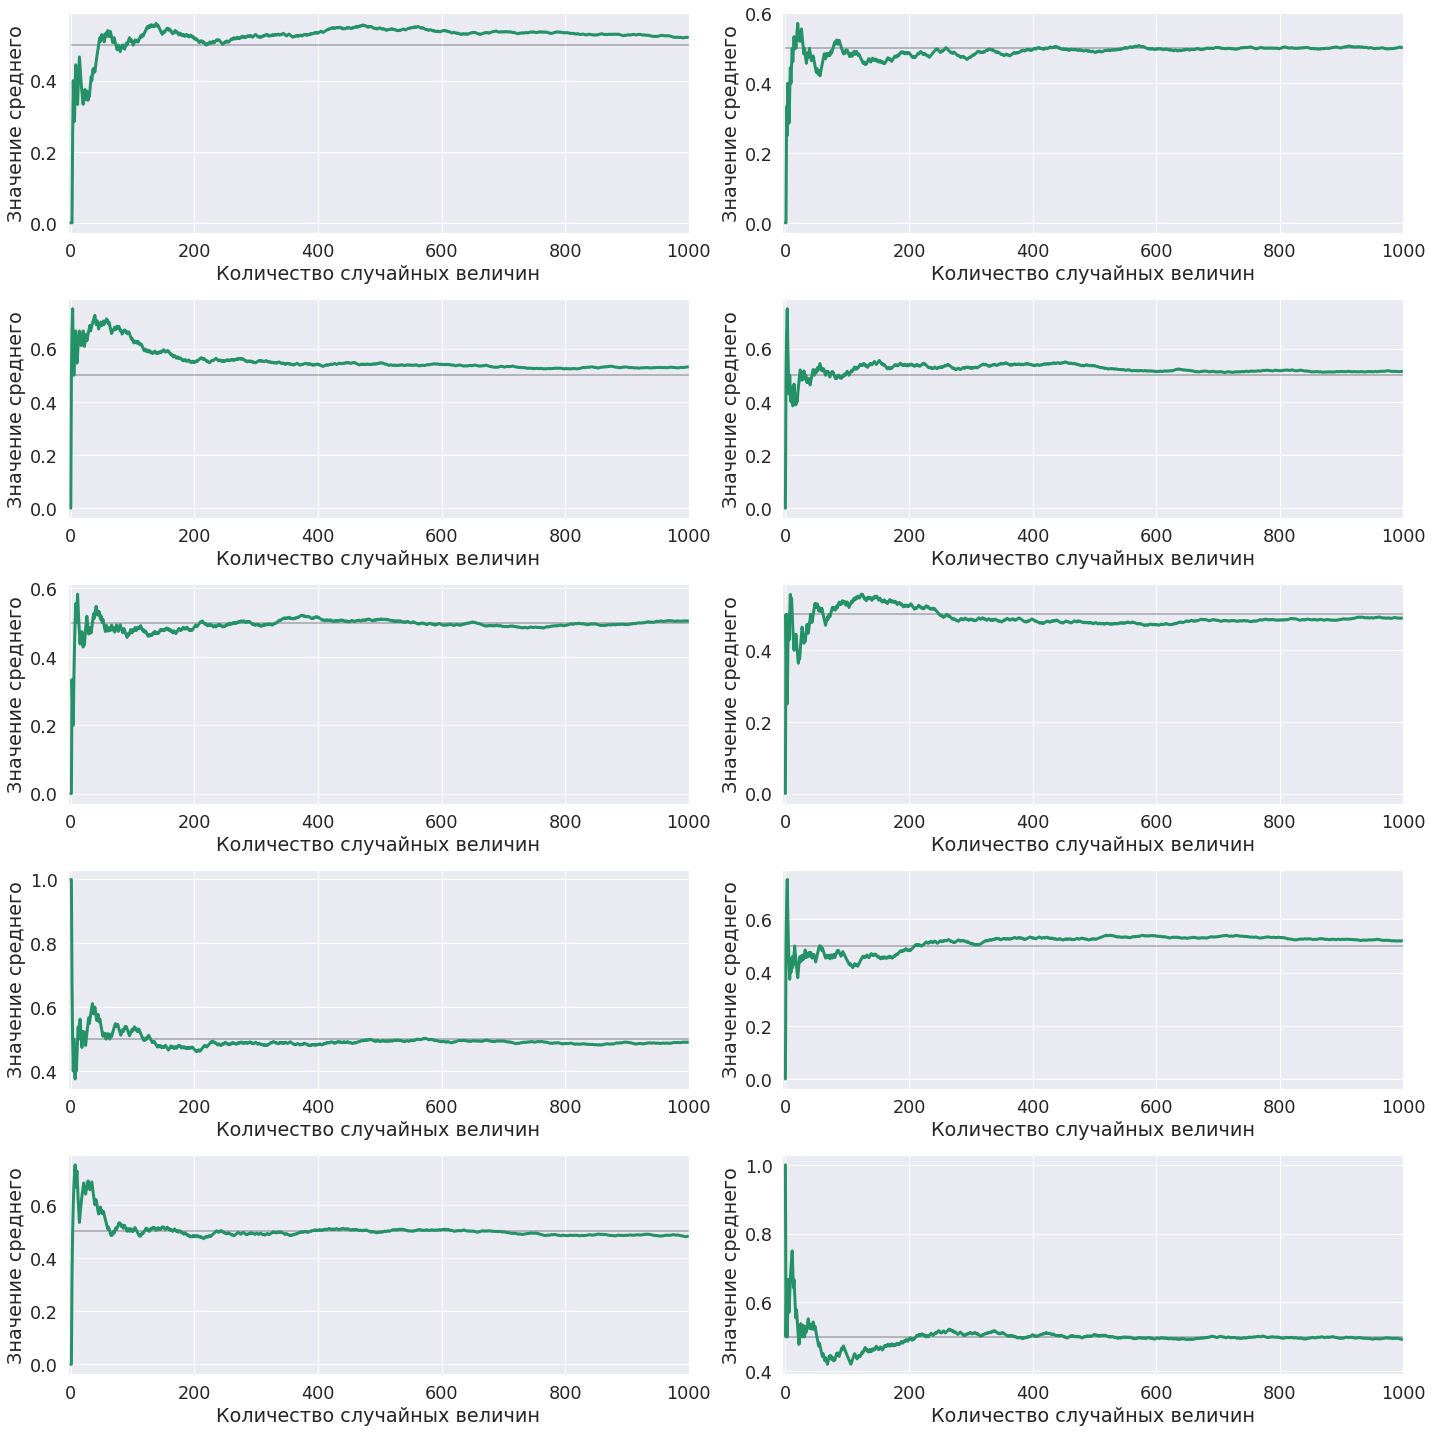

In [4]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.bernoulli(p=0.5).rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин

In [5]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

И нарисуем их всех одним цветом

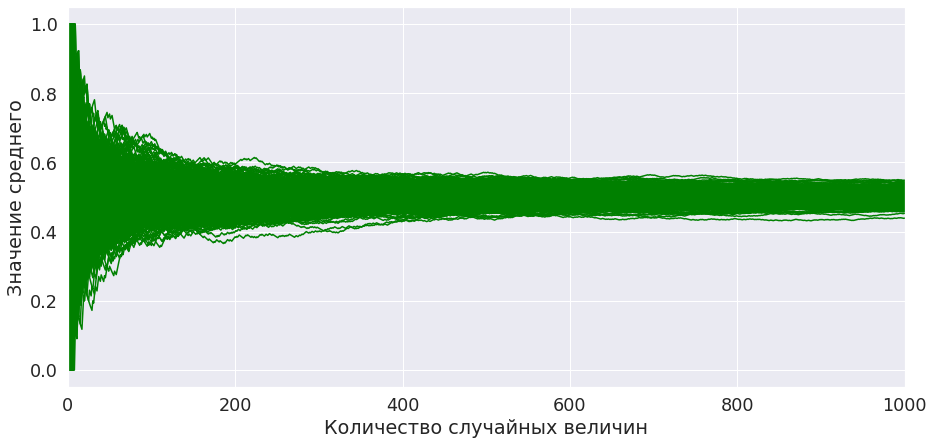

In [6]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

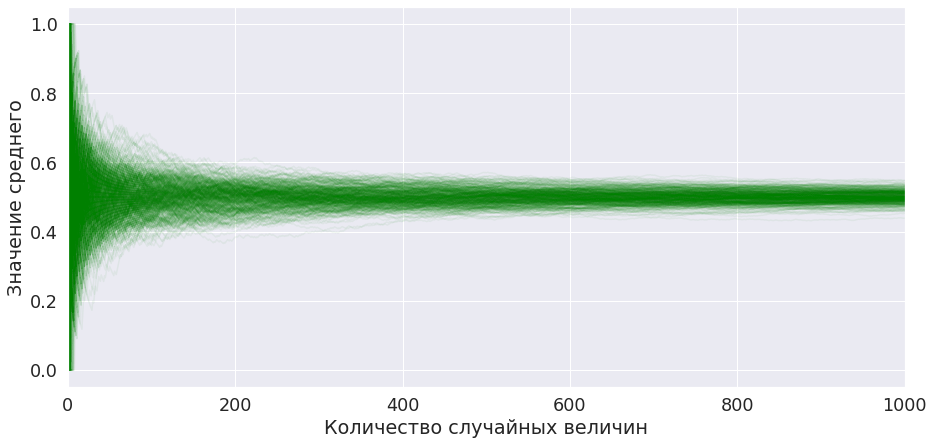

In [7]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще больше

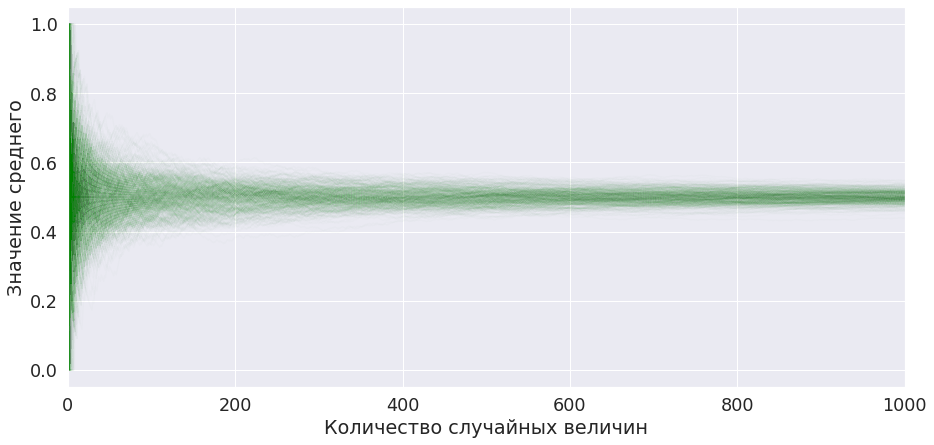

In [8]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

### 2. Оценка необходимого размера выборки

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - 0.5 \right|,$$
где $S_{nj}$ &mdash; среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

Пусть для нас допустимо отклонение от среднего на 0.02, иначе говоря при истинном среднем 0.5 мы считаем достаточно точными значения оценок от 0.48 до 0.52. Тогда необходимо взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуем данный эксперимент, используя уже ранее сгенерированные выборки

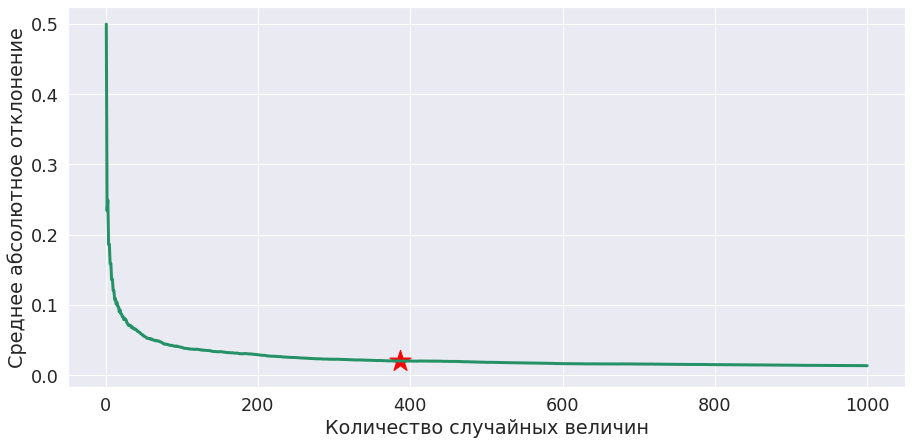

In [9]:
# считаем функционал качества по ранее посчитанным кумулятивным средним
mean_deviation = np.mean(np.abs(cum_means - 0.5), axis=0)
# определяем первый индекс, где значение укладывается в диаппазон
index = np.where(mean_deviation < 0.02)[0][0]

plt.figure(figsize=(15, 7))
plt.plot(np.arange(size) + 1, mean_deviation, lw=3)
plt.scatter(index, mean_deviation[index], color='red', marker='*', s=500)
plt.xlabel('Количество случайных величин')
plt.ylabel('Среднее абсолютное отклонение');

Из графика выше может показаться, что при большом количестве случайных величин отклонение перестает падать. Часто в таких случаях полезно логарифмировать значения или, что то же самое, рассматривать логарифмический масштаб оси.

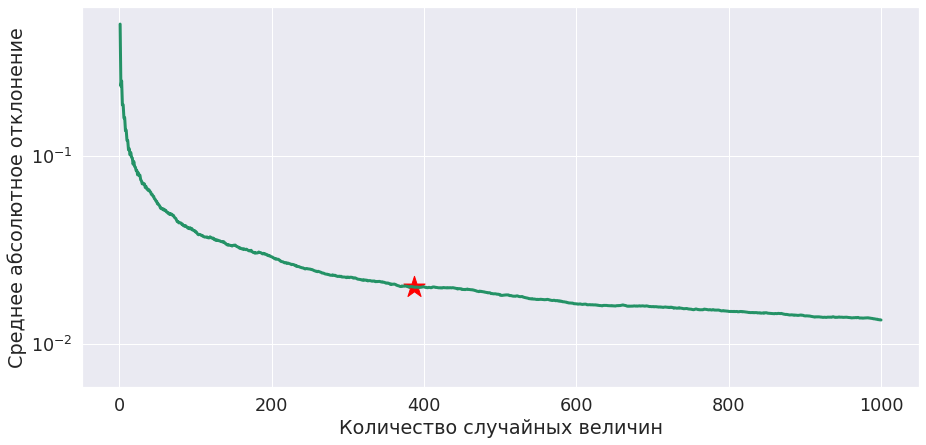

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(size) + 1, mean_deviation, lw=3)
plt.scatter(index, mean_deviation[index], color='red', marker='*', s=500)
plt.xlabel('Количество случайных величин')
plt.ylabel('Среднее абсолютное отклонение')
plt.yscale('log');

Тем самым в нашем эксперименте достаточно собрать чуть более 400 объектов.

Посмотрим на аналогичные графики для других распределений.

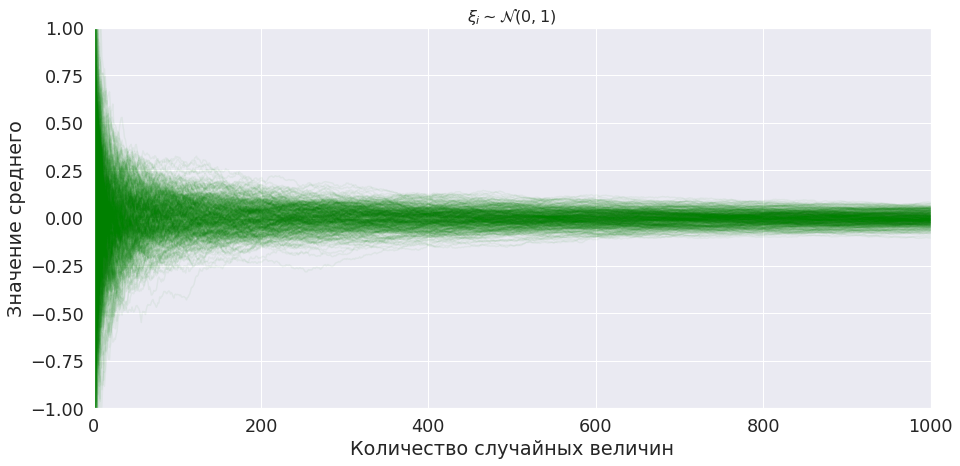

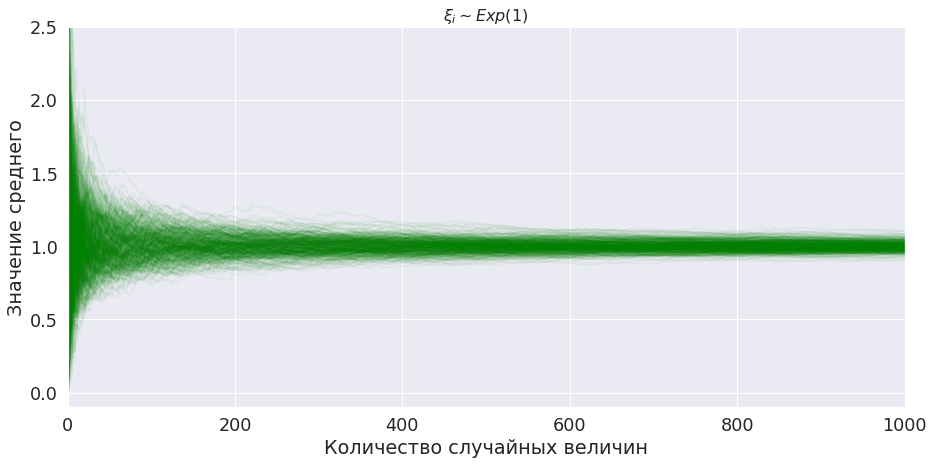

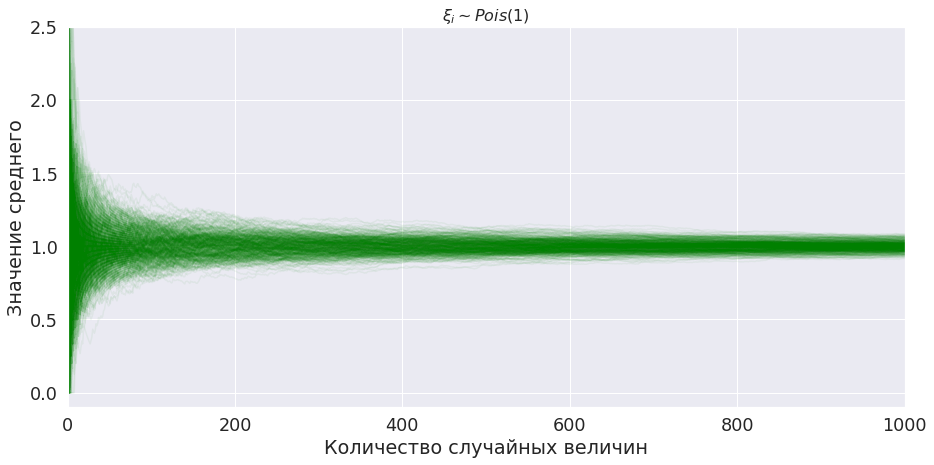

In [11]:
size = 1000
samples_count = 500

for distr, ylim, label in zip(
    [sps.norm(), sps.expon(), sps.poisson(mu=1)], 
    [(-1, 1), (-0.1, 2.5), (-0.1, 2.5)],
    ['$\\mathcal{N}(0, 1)$', '$Exp(1)$', '$Pois(1)$']
):
    
    # Генерация выборки и вычисление средних
    samples = distr.rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # График
    plt.figure(figsize=(15, 7))
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)
    plt.title('$\\xi_i \\sim ' + label[1:], fontsize=16)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((0, size));
    plt.ylim(ylim)
    plt.show()

**Вывод:** При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.